# <font color=cyan> Basic App Import with Tasks API</font>

The main goal of this Sample is to create third parties by **Process Templates API**, through chosen **Import Process Template**. The data is imported in CSV format.

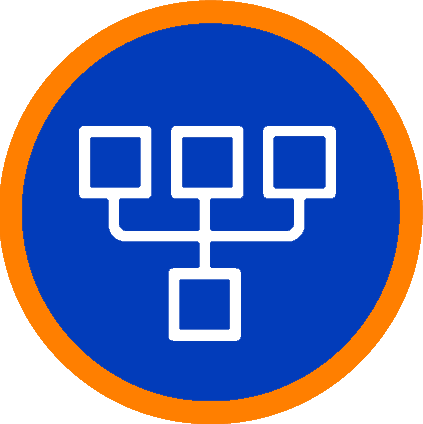

## <font color='yellow'>Code for token generation and API management </font>


In [53]:
#@title Select **servicePack** the Sample should run
from subprocess import getstatusoutput
servicePack = "DEMO" #@param ['DEMO','21SP11', '21SP10', '21SP9', '21SP8', '21SP7','21SP6'] {allow-input: true}

if servicePack == 'DEMO':
  branch = 'main'
else:
  branch = servicePack
print(branch)
rm = getstatusoutput("rm Colab_shared_code_for_API_usage -rf ") 
clone = getstatusoutput("git clone -l -s --branch " +  branch + " https://github.com/kyriba/Colab_shared_code_for_API_usage.git") 
import importlib
try:  
  importlib.reload(sample_requests)
except:
  print()
from Colab_shared_code_for_API_usage import sample_requests


main


In [54]:
#@title Import custom modules
import pandas as pd
from io import StringIO

## <font color='yellow'>Connect and retrieve token</font>

In [55]:
#@title <font color='lime'>Connect</font>
print('token:')
token = sample_requests.login()

token:
19fe1783-ed9b-4e27-aefe-ad6472e8a971


## <font color='yellow'>Create third party through Tasks API </font>

In [ ]:
def export_TP_by_code(PT, code):
  res1 = sample_requests.run_report(token, PT )
  buffer = StringIO(res1)
  df1 = pd.read_csv (buffer, delimiter = ";", header=None)
  columnsPT = ['Code', 'Name', 'Creditor', 'Debtor', 'Country code', 'Limit currency', 'Transaction entry limit', 'Transaction max. number']
  df1.columns = df1.iloc[0]
  df1 = df1.loc[df1['Code'] == code]
  df1 = df1[columnsPT]
  df1.dropna(axis=1, how='all', inplace=True)
  return df1

import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout
#@markdown ### <font color='lime'>Import Third party</font>
Third_Parties = True
Code =   'SAMPLE_NEW13'#@param {type:"string"}
Name =   'SAMPLE'#@param {type:"string"}
Country =   'PL'#@param['FR', 'GB', 'GG', 'JP', 'SG', 'US', 'PL'] {allow-input: true}
LimitCurrency =   'EUR'#@param['EUR', 'GBP', 'JPY', 'USD', 'PLN'] {allow-input: true}
isCreditor =   True#@param {type:"boolean"}
isDebtor =   True#@param {type:"boolean"}
#@markdown ### <br> </br>
#@markdown #### Import and display options
usePayload =   True#@param {type:"boolean"}
traces =   False#@param {type:"boolean"}

if Third_Parties:
  if traces:
    print('Checking if Third Parties were exported...\n')
    df1 = export_TP_by_code('SU11', Code)
  else:
    with HiddenPrints():
      df1 = export_TP_by_code('SU11', Code)
  creditor = '1' if isCreditor else '0'
  debtor = '1' if isDebtor else '0'
  thirdParty = Code+';'+Name+';1;'+Country+';'+LimitCurrency+';T;'+creditor+';'+debtor+';'
  if traces:
    print('Checking if the file was imported...\n')
    res2 = sample_requests.import_data(token, thirdParty, Code, 'IMP_THIRDP', usePayload, traces)
    if not df1.empty:
      print('\n{ "error": { "code": "Duplicate", "message": "The third party code you entered already exists!" } }')
  else:
    with HiddenPrints():
      res2 = sample_requests.import_data(token, thirdParty, Code, 'IMP_THIRDP', usePayload, traces)
  print('\nChecking if third party was created...\n')
  if traces:
    df2 = export_TP_by_code('SU11', Code)
  else:
    with HiddenPrints():
      df2 = export_TP_by_code('SU11', Code)
  if not df2.empty and df1.empty:
    print('Third party was created.\n')
    display(df2)
  else:
    print("\nThird party was not created.", end =" ")
    if not traces:
      print('Please enable traces to find out more.')

## <font color='yellow'>Kyriba APIs: build your future</font>

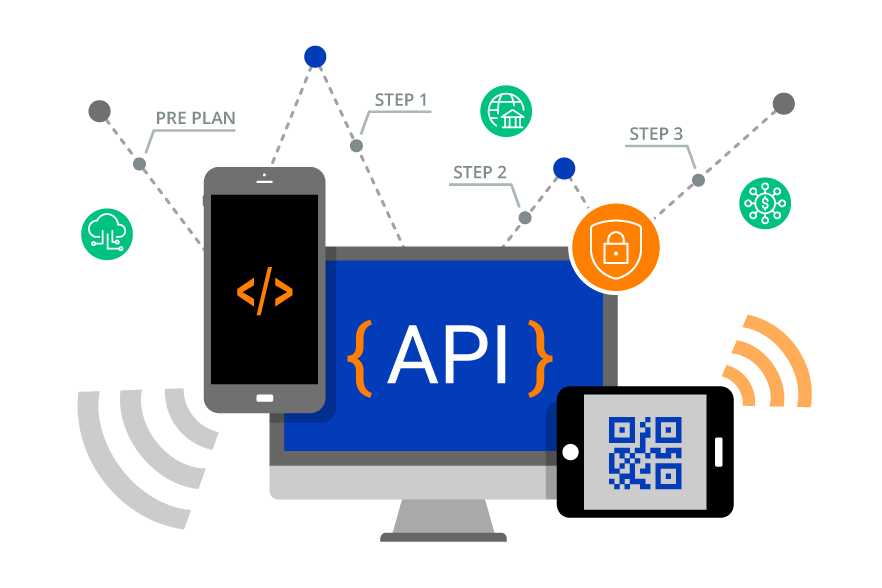